
Assignment 12: Neural Network and Deep Learning Basics

In [29]:
# Install & Import Dependencies

import os
import warnings
warnings.filterwarnings('ignore')
!pip install scikit-learn tensorflow tensorflow-datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

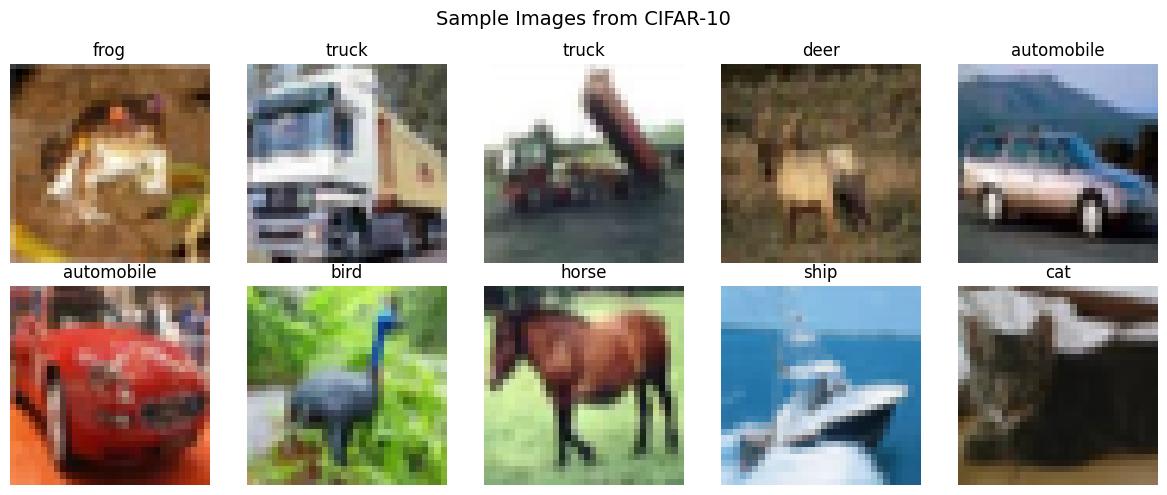

In [32]:
#  Load & Visualize Dataset (CIFAR-10 example)
# Load CIFAR-10
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Class names for visualization
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Preview sample images
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10", fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
# Normalize & (Optional) Augment Images

# Normalize image pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Optional: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)
datagen.fit(X_train)

In [34]:
# Build Feedforward Neural Network

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
# Train the Model
history = model.fit(
    datagen.flow(X_train, y_train_cat, subset='training', batch_size=64),
    validation_data=datagen.flow(X_train, y_train_cat, subset='validation'),
    epochs=15
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 73ms/step - accuracy: 0.2539 - loss: 2.0643 - val_accuracy: 0.3410 - val_loss: 1.8335
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.3426 - loss: 1.8243 - val_accuracy: 0.3727 - val_loss: 1.7214
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.3751 - loss: 1.7421 - val_accuracy: 0.3871 - val_loss: 1.6971
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.3848 - loss: 1.7184 - val_accuracy: 0.4083 - val_loss: 1.6557
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.4027 - loss: 1.6690 - val_accuracy: 0.3926 - val_loss: 1.6759
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4110 - loss: 1.6430 - val_accuracy: 0.4171 - val_loss: 1.6239
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4164 - loss: 1.6306 - val_accuracy: 0.4221 - val_loss: 1.6165
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.4257 - loss: 1.6073 - 

In [9]:
# For comparison without augmentation
# history = model.fit(
#     X_train, y_train_cat,
#     epochs=15,
#     batch_size=64,
#     validation_split=0.2
# )

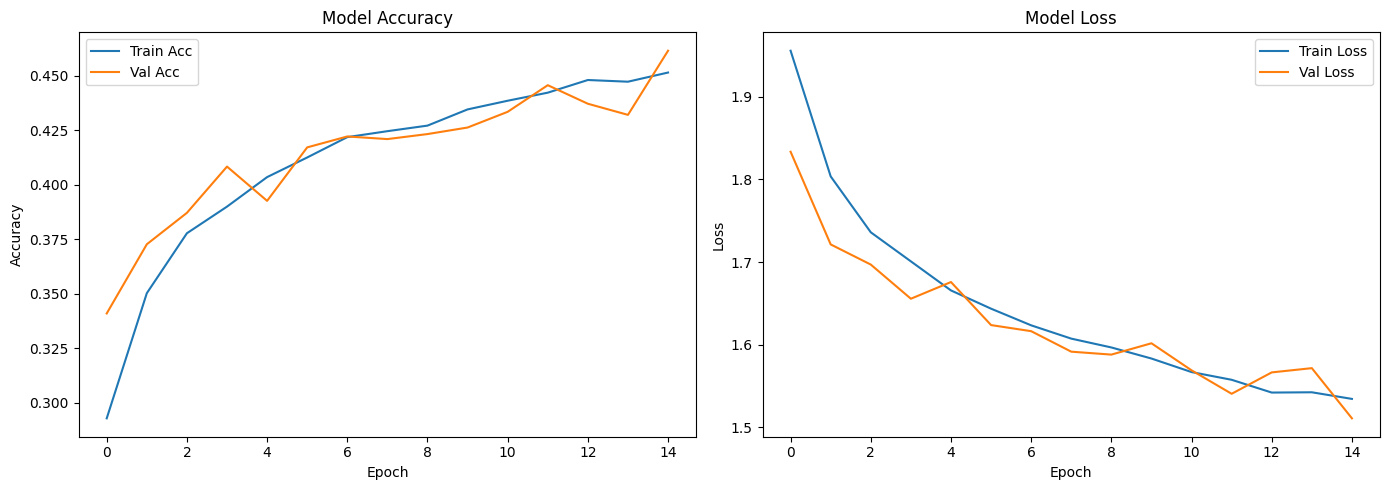

In [37]:
# Plot Training Performance
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# Evaluate on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=2)
print(f"✅ Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.4911 - loss: 1.4439
✅ Test Accuracy: 0.4911


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

    airplane       0.59      0.51      0.55      1000
  automobile       0.54      0.69      0.61      1000
        bird       0.40      0.32      0.36      1000
         cat       0.38      0.33      0.35      1000
        deer       0.43      0.45      0.44      1000
         dog       0.47      0.29      0.36      1000
        frog       0.48      0.57      0.52      1000
       horse       0.46      0.63      0.53      1000
        ship       0.58      0.65      0.61      1000
       truck       0.56      0.47      0.51      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



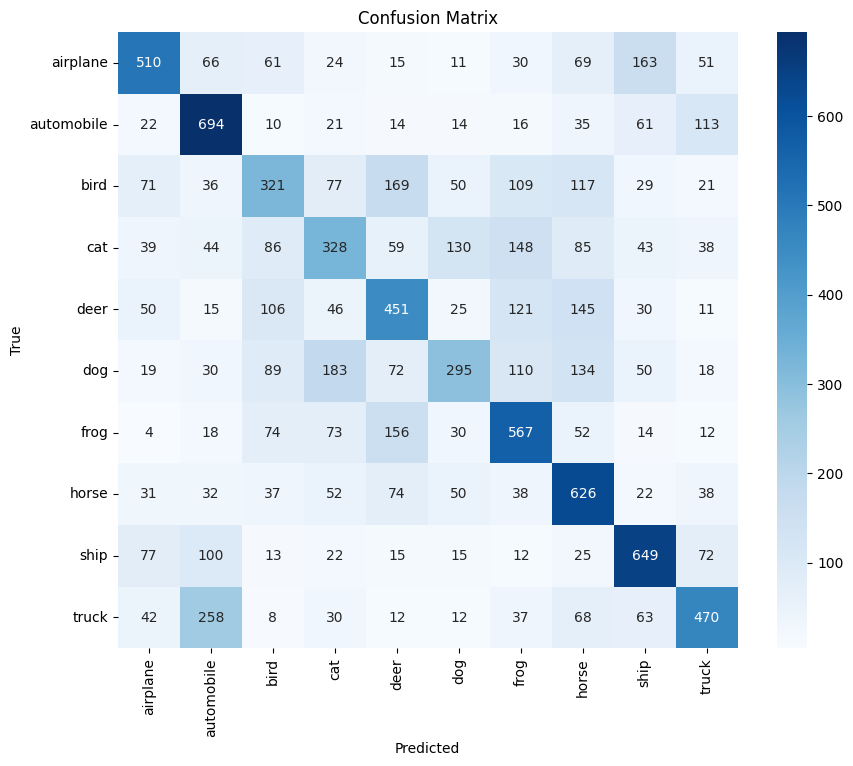

In [41]:
# Classification Metrics & Confusion Matrix

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

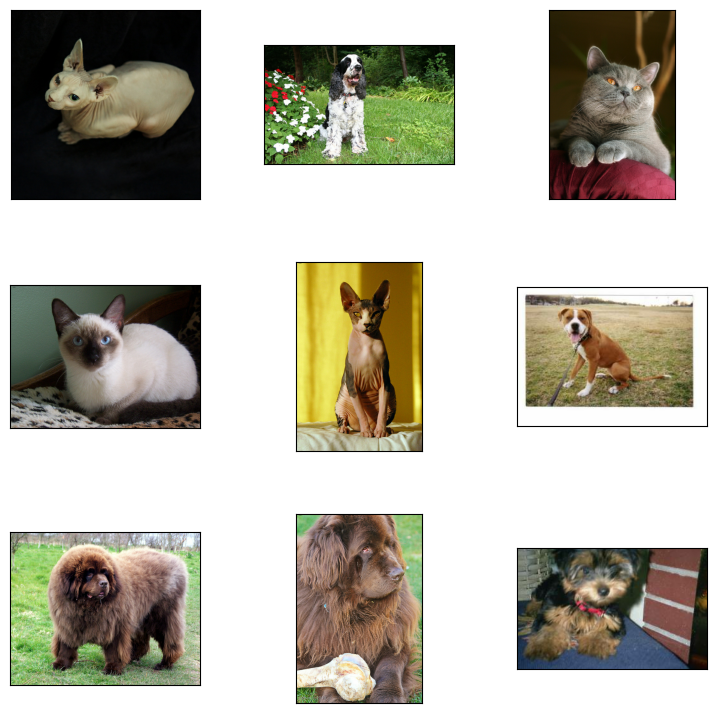

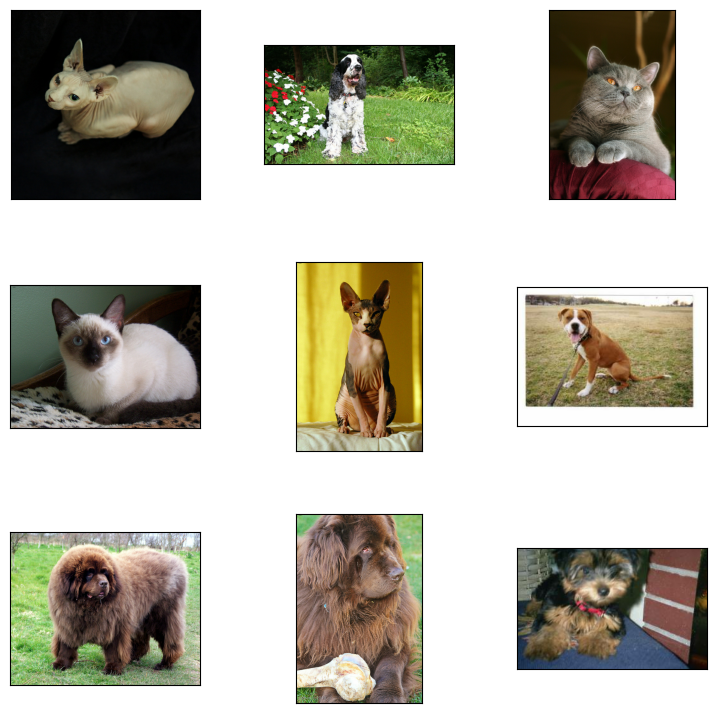

In [22]:
import tensorflow_datasets as tfds

# Load the dataset
ds, info = tfds.load('oxford_iiit_pet', split='train', with_info=True)

# Show sample images using the correct image key
tfds.visualization.show_examples(ds, info, image_key='image')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')